In [1]:
# This is the combination of lab 1, 2 and 3 completed by Mahbubur Rahman Opu.
# It includes different data-related problem solvings using python.
# data is cleaned, organized and wrenkled here.
# Different statistical analysis and graphical representation 
# Single and Multiple Linear regresssion 
# Sloping(coefficient), correlation , descriptive and Intersect analysis
# Use of Linegraph, histogram, Boxplot and scatter plot and so on .

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy
%matplotlib inline
import urllib.request


In [2]:
csv_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"


In [3]:
file_name, header= urllib.request.urlretrieve(csv_url)

In [4]:
df=pd.read_csv(file_name)

In [5]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [7]:
df.columns =headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
# Assuming you have already loaded the CSV file into 'df' and replaced "?" with NaN
df.replace("?", pd.NA, inplace=True)

In [9]:
df.columns =headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,<NA>,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,<NA>,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:


# Find missing values using isnull()
missing_values = df.isnull()

# Find columns with missing values and count them
columns_with_missing = missing_values.any()  # Returns a boolean Series where True indicates columns with missing values
missing_count_per_column = missing_values.sum()  # Returns a Series with the count of missing values per column

# Display columns with missing values
columns_with_missing = columns_with_missing[columns_with_missing]  # Filter out only the columns with missing values
print("Columns with missing values:")
print(columns_with_missing)

# Display count of missing values per column
print("\nCount of missing values per column:")
print(missing_count_per_column)


Columns with missing values:
normalized-losses    True
num-of-doors         True
bore                 True
stroke               True
horsepower           True
peak-rpm             True
price                True
dtype: bool

Count of missing values per column:
symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [11]:
# Convert the "normalized-losses" column to numeric (float) data type
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")

# Calculate the average of "normalized-losses" column
avg_norm_loss = df["normalized-losses"].mean()

print("Average of normalized-losses:", avg_norm_loss)


Average of normalized-losses: 122.0


In [12]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [13]:
import pandas as pd

# Assuming you have already loaded the CSV file into 'df' and replaced "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert the "bore" column to numeric (float) data type
df["bore"] = pd.to_numeric(df["bore"], errors="coerce")

# Calculate the average of "bore" column
avg_bore = df["bore"].mean()

print("Average of bore:", avg_bore)


Average of bore: 3.3290499999999996


In [14]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [15]:
import pandas as pd

# Assuming you have already loaded the CSV file into 'df' and replaced "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert the "stroke" column to numeric (float) data type
df["stroke"] = pd.to_numeric(df["stroke"], errors="coerce")

# Calculate the average of "stroke" column excluding NaN values
avg_stroke = df["stroke"].mean(skipna=True)

print("Average of stroke:", avg_stroke)


# Fill missing values in "stroke" column with the average value
df["stroke"].fillna(avg_stroke, inplace=True)

# Display the DataFrame with missing values filled using the average value for "stroke" column
print(df.head())


Average of stroke: 3.2582999999999993
   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          1              122.0  alfa-romero       gas        std   
2          2              164.0         audi       gas        std   
3          2              164.0         audi       gas        std   
4          2              122.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two    hatchback          rwd           front        94.5  ...   
2         four        sedan          fwd           front        99.8  ...   
3         four        sedan          4wd           front        99.4  ...   
4          two        sedan          fwd           front        99.8  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0         

In [16]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [17]:

# Convert the "horsepower" column to numeric (integer) data type
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Calculate the average of "horsepower" column excluding NaN values
avg_horsepower = df["horsepower"].mean(skipna=True)

# Fill missing values in "horsepower" column with the average value
df["horsepower"].fillna(avg_horsepower, inplace=True)

# Display the DataFrame with missing values filled using the average value for "horsepower" column
print(df.head())


   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          1              122.0  alfa-romero       gas        std   
2          2              164.0         audi       gas        std   
3          2              164.0         audi       gas        std   
4          2              122.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two    hatchback          rwd           front        94.5  ...   
2         four        sedan          fwd           front        99.8  ...   
3         four        sedan          4wd           front        99.4  ...   
4          two        sedan          fwd           front        99.8  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [18]:

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [19]:
# Convert the "peak-rpm" column to numeric (integer) data type
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors="coerce")

# Calculate the average of "peak-rpm" column excluding NaN values
avg_peak_rpm = df["peak-rpm"].mean(skipna=True)

# Fill missing values in "peak-rpm" column with the average value
df["peak-rpm"].fillna(avg_peak_rpm, inplace=True)

# Display the DataFrame with missing values filled using the average value for "peak-rpm" column
print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          1              122.0  alfa-romero       gas        std   
2          2              164.0         audi       gas        std   
3          2              164.0         audi       gas        std   
4          2              122.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two    hatchback          rwd           front        94.5  ...   
2         four        sedan          fwd           front        99.8  ...   
3         four        sedan          4wd           front        99.4  ...   
4          two        sedan          fwd           front        99.8  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [20]:
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

In [21]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [23]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [24]:
# Data Formatting , changing data types


df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [25]:
# Calculate "city-L/100km" using the conversion formula and replace "city-mpg" column with the result
df["city-L/100km"] = 235 / df["city-mpg"]


In [26]:

# Calculate "highway-L/100km" using the conversion formula and replace the data in the "highway-mpg" column
df["highway-mpg"] = 235 / df["highway-mpg"]

In [27]:
# Rename the "highway-mpg" column to "Highway-100km"
df.rename(columns={"highway-mpg": "Highway-L100km"}, inplace=True)

# Display the DataFrame with "highway-mpg" data converted to "Highway-100km" and column name updated
print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          1                122  alfa-romero       gas        std   
2          2                164         audi       gas        std   
3          2                164         audi       gas        std   
4          2                122         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two    hatchback          rwd           front        94.5  ...   
2         four        sedan          fwd           front        99.8  ...   
3         four        sedan          4wd           front        99.4  ...   
4          two        sedan          fwd           front        99.8  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68             

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,Highway-L100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,9.400000,15250.0,12.368421


In [29]:
# Data Normalization
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [30]:
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


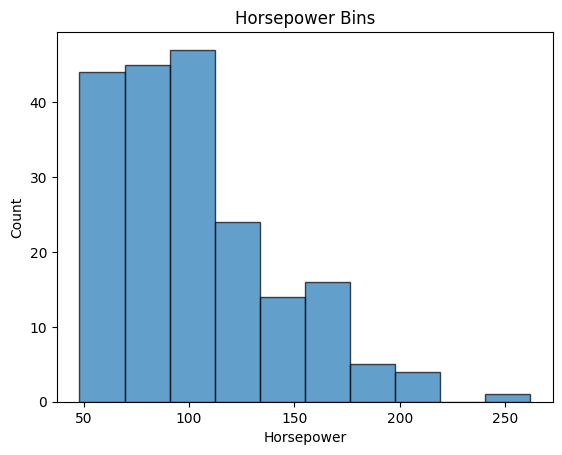

In [31]:
# Convert the "horsepower" column to numeric (integer) data type
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Create the histogram with counts
plt.hist(df["horsepower"], edgecolor="k", alpha=0.7)

# Set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

# Show the plot
plt.show()

In [32]:

# Define the bin edges using np.linspace to create 3 equal-width bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

# Define the labels for the bins
group_names = ['Low', 'Medium', 'High']

# Create a new column "horsepower-binned" with the bin labels based on the "horsepower" column
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

# Display the "horsepower" column and the new "horsepower-binned" column for the first 20 rows
print(df[['horsepower', 'horsepower-binned']].head(20))

# Count the occurrences of each bin in the "horsepower-binned" column
bin_counts = df["horsepower-binned"].value_counts()

# Display the count of occurrences for each bin
print(bin_counts)

    horsepower horsepower-binned
0        111.0               Low
1        154.0            Medium
2        102.0               Low
3        115.0               Low
4        110.0               Low
5        110.0               Low
6        110.0               Low
7        140.0            Medium
8        101.0               Low
9        101.0               Low
10       121.0            Medium
11       121.0            Medium
12       121.0            Medium
13       182.0            Medium
14       182.0            Medium
15       182.0            Medium
16        48.0               Low
17        70.0               Low
18        70.0               Low
19        68.0               Low
horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64


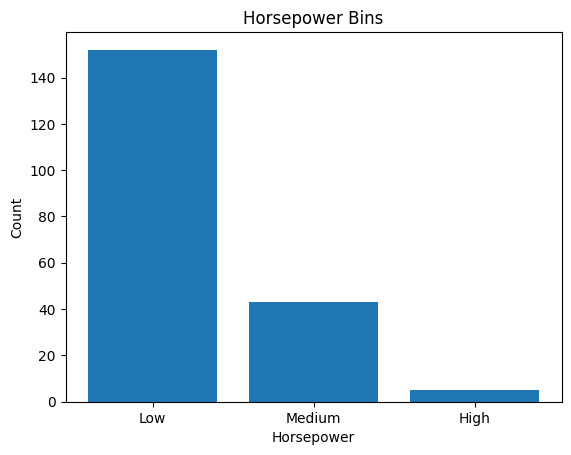

In [33]:

# Create a bar plot to visualize the count of occurrences for each bin
plt.bar(group_names, bin_counts)

# Set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

# Show the plot
plt.show()


Text(0.5, 1.0, 'horsepower bins')

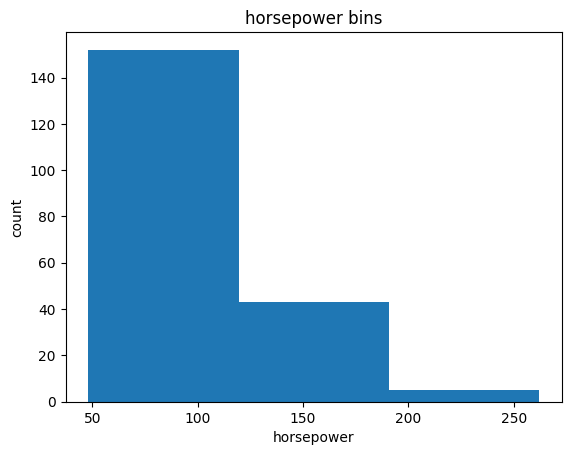

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [35]:
# Convert the "fuel-type" column to dummy variables
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

# Rename the columns to provide more descriptive names
dummy_variable_1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)

# Display the first few rows of the dummy variables DataFrame with the updated column names
print(dummy_variable_1.head())

   fuel-type-diesel  fuel-type-gas
0             False           True
1             False           True
2             False           True
3             False           True
4             False           True


In [36]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [37]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()
# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [38]:
df.to_csv('clean_df.csv')

In [39]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002034,0.566835
stroke,-0.051087,1.000000,0.186780,0.101003
compression-ratio,0.002034,0.186780,1.000000,-0.214282
horsepower,0.566835,0.101003,-0.214282,1.000000


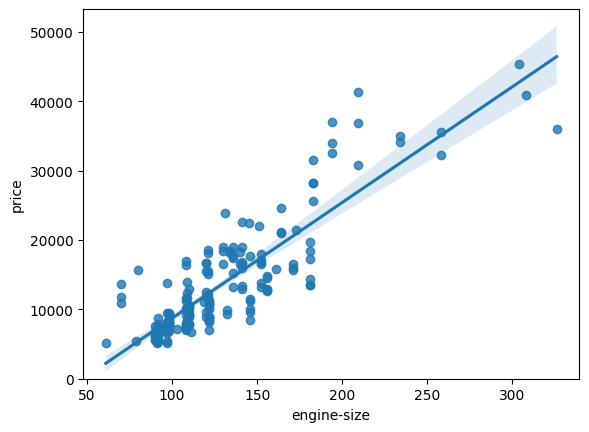

In [40]:
#Let's find the scatterplot of "engine-size" and "price".

# Engine size as potential predictor variable of price
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
sns.regplot(x="engine-size", y="price", data=df)

# Set the y-axis lower limit to 0
plt.ylim(0)

# Show the plot
plt.show()


In [41]:
# Now the correlation between engine size and price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


,Highway-L100km,price
Highway-L100km,1.000000,0.801313
price,0.801313,1.000000


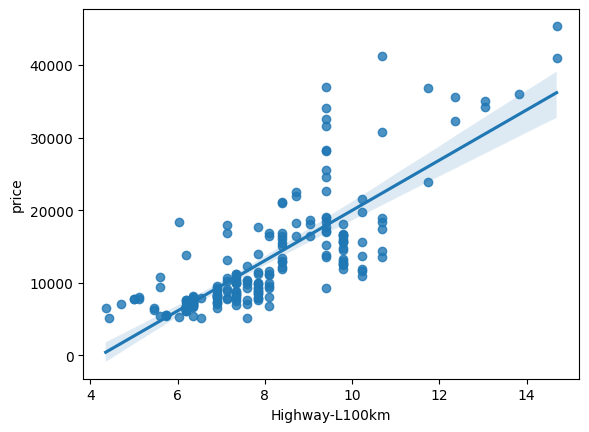

In [42]:

sns.regplot(x="Highway-L100km", y="price", data=df)

df[["Highway-L100km", "price"]].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


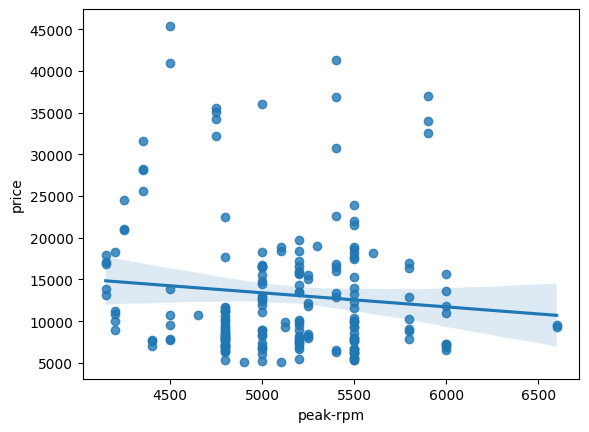

In [43]:

sns.regplot(x="peak-rpm", y="price", data=df)
df[["peak-rpm", "price"]].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


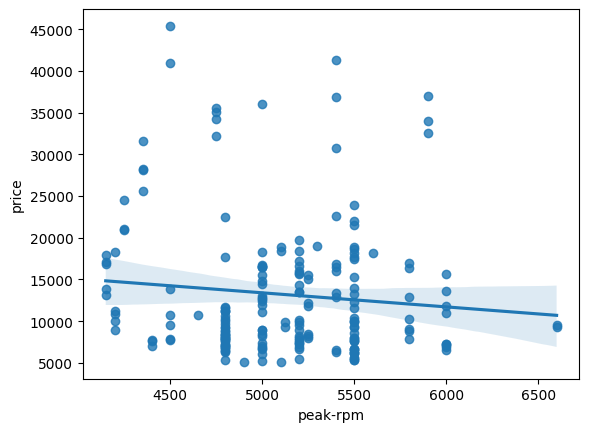

In [44]:

sns.regplot(x="peak-rpm", y="price", data=df)
df[["peak-rpm", "price"]].corr()


,stroke,price
stroke,1.000000,0.083298
price,0.083298,1.000000


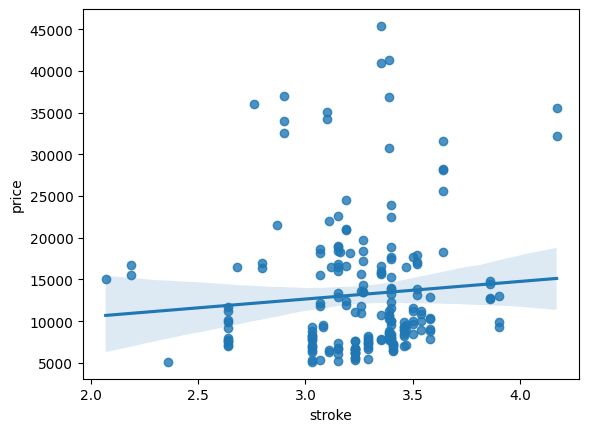

In [45]:
sns.regplot(x="stroke", y="price", data=df)
df[['stroke','price']].corr()

<Axes: xlabel='body-style', ylabel='price'>

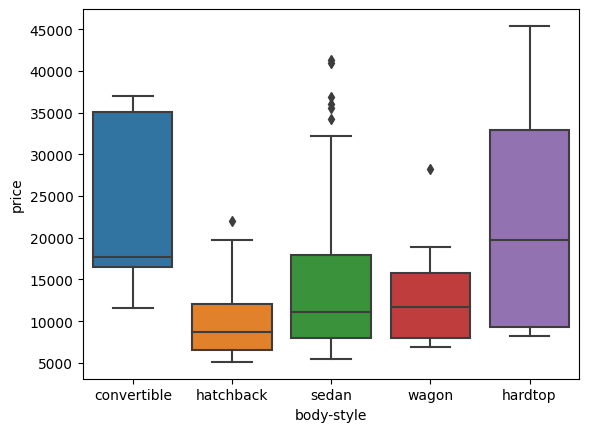

In [46]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

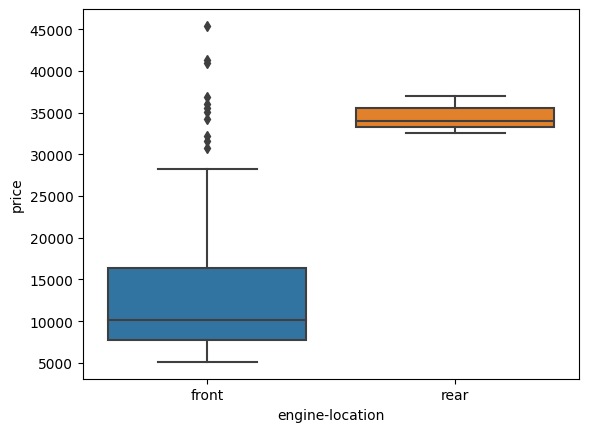

In [47]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

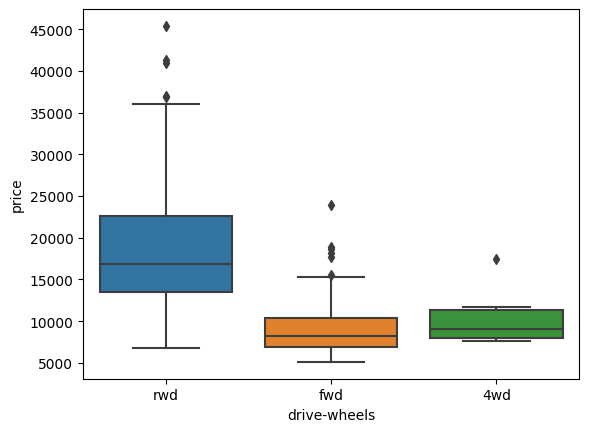

In [48]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [49]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [50]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,197
rear,3


In [51]:
# GROUP BY


In [52]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [53]:
# This grouped data is much easier to visualize when it is made into a pivot table.
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [54]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [55]:
# grouping results answer to question 4
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


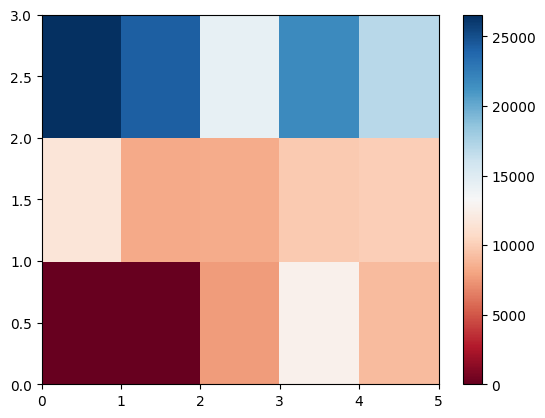

In [56]:
#Let's use a heat map to visualize the relationship between Body Style vs Price.

# use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

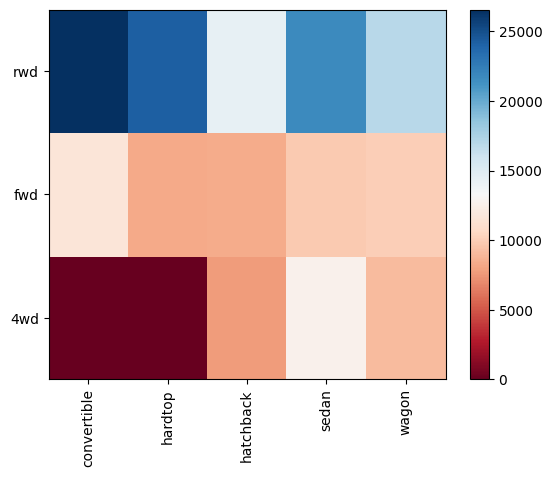

In [57]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [58]:
#Correlation and Causation

from scipy import stats

In [59]:
#Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.45701950205028e-20


In [60]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096285039868479  with a P-value of P =  1.0606770463025391e-47


In [61]:

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


The Pearson Correlation Coefficient is 0.6910440897821905  with a P-value of P =  9.960963222348494e-30


In [62]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7527948631832609  with a P-value of P = 8.256714148308062e-38


In [63]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498461  with a P-value of P =  3.9699775360218265e-53


In [64]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521141  with a P-value of P = 1.8977171466564964e-63


In [65]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.2074875241946e-17


In [66]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862684  with a P-value of P =  2.7292565684792725e-29


In [67]:
# To see if different types of 'drive-wheels' impact 'price', we group the data.

grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
...,...,...,...
195,rwd,sedan,16845.0
196,rwd,sedan,19045.0
197,rwd,sedan,21485.0
198,rwd,sedan,22470.0


In [68]:
grouped_test2.get_group('4wd')['price']

3      17450.0
135     7603.0
139     9233.0
140    11259.0
143     8013.0
144    11694.0
149     7898.0
150     8778.0
Name: price, dtype: float64

In [69]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 68.49603532807176 , P = 2.6116313994533828e-23


In [70]:
# Let's examine them separately.

# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 131.59324661179534 , P = 1.7388247444783172e-23


In [71]:
# Let's examine the other groups.

# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.67069478113451 , P = 0.004232262975461324


In [72]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 0.665465750252303 , P = 0.4162011669784502


In [73]:
print("Lab 3 Finished and Lab 4 Starts here")

Lab 3 Finished and Lab 4 Starts here


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lm = LinearRegression()
lm

LinearRegression()

In [77]:
X = df[['Highway-L100km']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [78]:
# We can output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15496.76826929, 16655.24161063, 12484.73758181, 22342.29255902,
       17906.39281928])

In [79]:
lm.intercept_

-14623.53860550238

In [80]:
lm.coef_

array([3460.63100264])

In [81]:
# Q 1 a) create a linear regression lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [82]:
# Question 1 b): Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [83]:
 #1 c): Find the slope and intercept of the model.
lm1.intercept_

-7962.440979163077

In [84]:
lm1.coef_

array([166.8621392])

In [85]:
#1 d): What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [86]:
# Multiple Regression

Z = df[['horsepower', 'curb-weight', 'engine-size', 'Highway-L100km']]

In [87]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df['price'])

LinearRegression()

In [88]:
lm.intercept_

-14384.528549363082

In [89]:
lm.coef_

array([ 36.59635285,   3.49429735,  85.38975261, 502.93300499])

In [90]:
# Q2 a): Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [91]:
lm2 = LinearRegression()
X = df[['normalized-losses','Highway-L100km' ]]
Y = df['price']
lm2.fit(X,Y)

LinearRegression()

In [92]:
# Q 2 b): Find the coefficient of the model


In [93]:
lm2.coef_

array([-2.88571504e+00,  3.46972536e+03])

In [94]:
lm2.intercept_

-14344.615137705625

(0.0, 47716.89766465479)

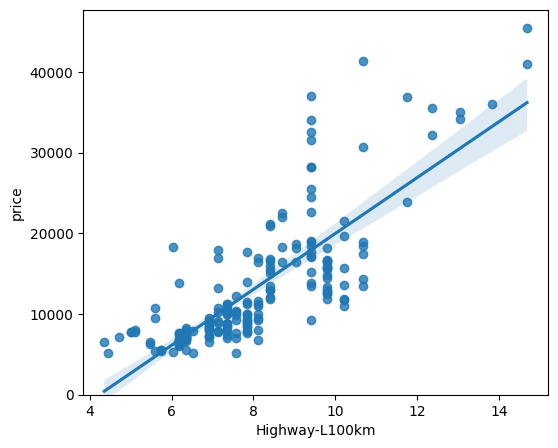

In [95]:
# While visualizing, we can fix the height and width of the figure. But it's optional.
width = 6
height = 5
plt.figure(figsize=(width, height)) # until here it's optioinal.
sns.regplot(x="Highway-L100km", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

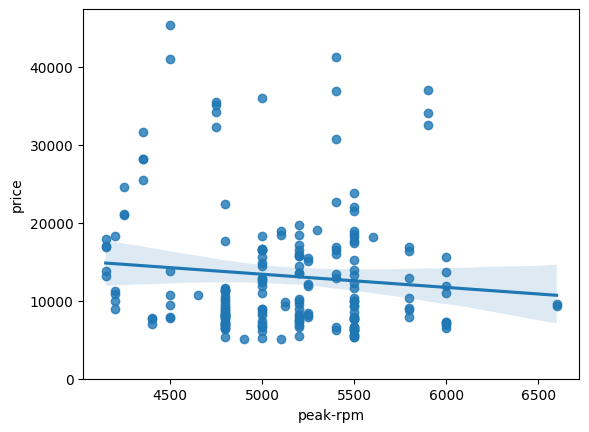

In [96]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [97]:
# Question 3: Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.

In [98]:
df[["Highway-L100km", "peak-rpm", "price"]].corr()

,Highway-L100km,peak-rpm,price
Highway-L100km,1.000000,0.018142,0.801313
peak-rpm,0.018142,1.000000,-0.101593
price,0.801313,-0.101593,1.000000


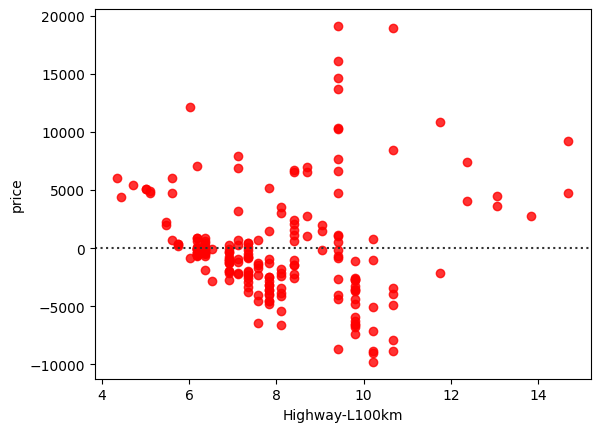

In [99]:
# Residual plot
sns.residplot(x=df['Highway-L100km'],y=df['price'], color= "r") # I added the color optionally as red
plt.show()

In [100]:
# Distribution Plot
Y_hat = lm.predict(Z)


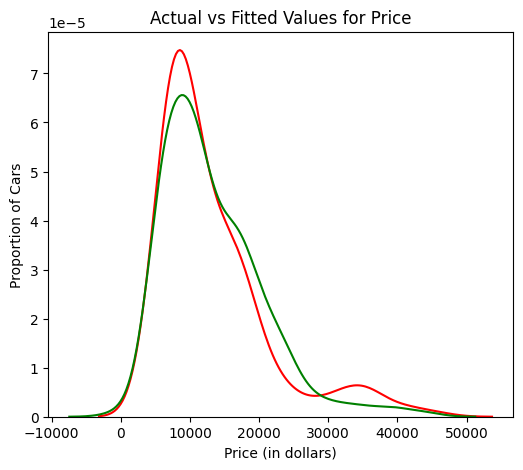

In [101]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [102]:
# Polynomial Regression, where linear regression does not fit.
from sklearn.preprocessing import PolynomialFeatures

In [103]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [104]:
x = df['Highway-L100km']
y = df['price']

In [105]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-23.38 x + 922.1 x - 7064 x + 2.145e+04


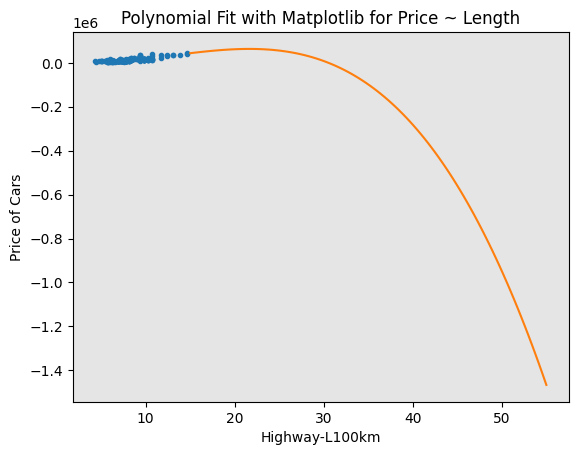

In [106]:
# Let's plot this function
PlotPolly(p, x, y, 'Highway-L100km')

In [107]:
np.polyfit(x, y, 3)

array([  -23.37611329,   922.12919775, -7063.83725212, 21445.20344533])

In [108]:
# Question 4: Create 11 order polynomial model with the variables x and y from above.

          11          10         9        8             7            6
0.004538 x  - 0.5764 x  + 31.67 x - 1002 x + 2.042e+04 x - 2.82e+05 x
            5             4             3             2
 + 2.7e+06 x - 1.796e+07 x + 8.141e+07 x - 2.398e+08 x + 4.133e+08 x - 3.162e+08


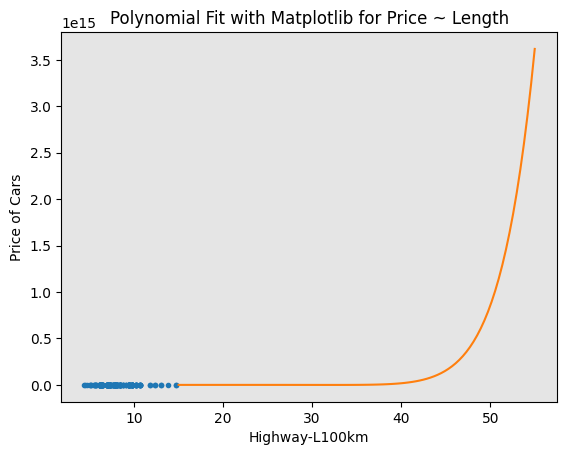

In [109]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway-L100km')

In [110]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [111]:
Z_pr=pr.fit_transform(Z)

In [112]:
Z.shape

(200, 4)

In [113]:
Z_pr.shape

(200, 15)

In [114]:
# PipeLine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [115]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [116]:
# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [117]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [118]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12372.33994572, 18413.30220287,  9963.46420738, 17532.55090918])

In [119]:
# Question 5:Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [120]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([14059.18396439, 18640.69422976, 10761.59725707, 16677.19301892,
       14741.8503245 , 15919.42853163, 16303.80124019, 18617.88287474,
       10978.13011767, 10978.13011767])

In [121]:
# Model 1. in terms of simple linear regression
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.642233100431214


In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15095959.137452


In [125]:
# Model 2: Multiple Linear Regression
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8118257344636244


In [126]:
Y_predict_multifit = lm.predict(Z)

In [127]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11884229.858343858


In [128]:
# Model 3: Polynomial Fit
from sklearn.metrics import r2_score

In [129]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6754211963161392


In [130]:
mean_squared_error(df['price'], p(x))

20498919.441136908